In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\programfileselfmade\anaconda1402\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\programfileselfmade\anaconda1402\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "d:\programfileselfmade\anaconda1402\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "d:\programfileselfmade\anaconda1402\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
 

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\programfileselfmade\anaconda1402\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\programfileselfmade\anaconda1402\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "d:\programfileselfmade\anaconda1402\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "d:\programfileselfmade\anaconda1402\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
 

AttributeError: _ARRAY_API not found

In [2]:
df=pd.read_csv('data.csv', encoding='ISO-8859-1')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df=df[df['UnitPrice']>0 ]

In [8]:
df.min()

InvoiceNo                              536365
StockCode                               10002
Description     4 PURPLE FLOCK DINNER CANDLES
Quantity                               -80995
InvoiceDate                   1/10/2011 10:07
UnitPrice                               0.001
CustomerID                            12346.0
Country                             Australia
dtype: object

In [9]:
# Drop rows with missing values in critical columns
df.dropna(subset=['CustomerID', 'Description'], inplace=True)

C:\Users\Maede\AppData\Local\Temp\ipykernel_13600\2060925811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['CustomerID', 'Description'], inplace=True)


In [10]:
# Convert date column to datetime format (assuming 'InvoiceDate' column exists)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year, month, and day for analysis
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

C:\Users\Maede\AppData\Local\Temp\ipykernel_13600\3482351850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
C:\Users\Maede\AppData\Local\Temp\ipykernel_13600\3482351850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
C:\Users\Maede\AppData\Local\Temp\ipykernel_13600\3482351850.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [11]:
# Filter rows for the year 2010 and 2011
rows_2010 = df[df['InvoiceDate'].dt.year == 2010].shape[0]
rows_2011 = df[df['InvoiceDate'].dt.year == 2011].shape[0]

print(f"Number of rows for the year 2010: {rows_2010}")
print(f"Number of rows for the year 2011: {rows_2011}")

Number of rows for the year 2010: 26847
Number of rows for the year 2011: 379942


In [13]:
# Calculate total sales (assuming columns 'Quantity' and 'UnitPrice')
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [14]:
# Aggregate total sales by month
monthly_sales = df.groupby('YearMonth')['TotalSales'].sum().reset_index()

In [15]:
monthly_sales.dtypes

YearMonth     period[M]
TotalSales      float64
dtype: object

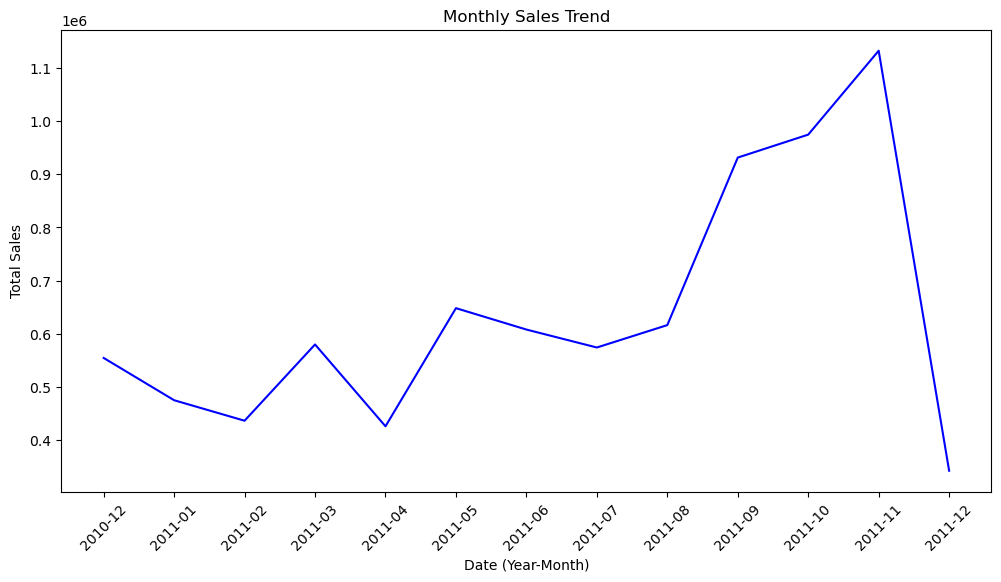

In [16]:
# Convert 'YearMonth' to string format (if it's a period type)
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.strftime('%Y-%m')

# Plot sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='TotalSales',  color='b')
# Add title and labels
plt.title('Monthly Sales Trend')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

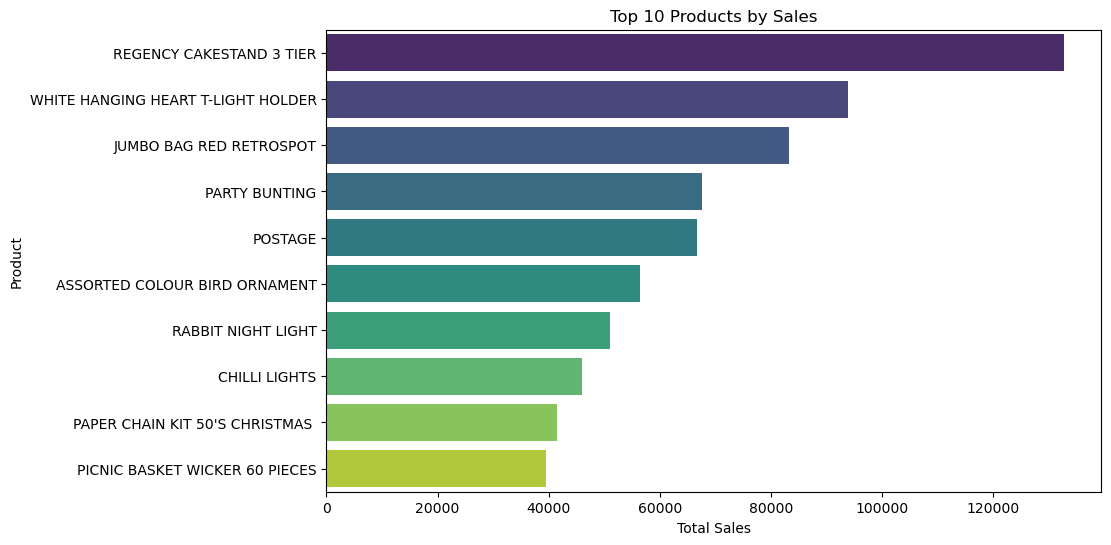

In [17]:
# Group by product and sum total sales
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plot top 10 products by sales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()

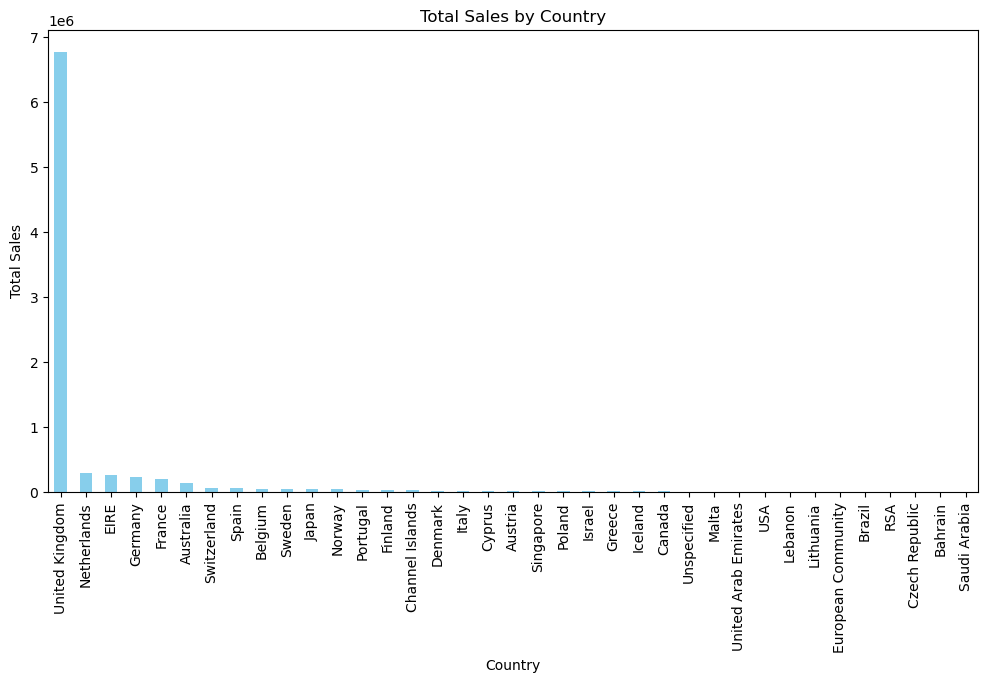

In [18]:
# Aggregate total sales by country
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Plot total sales by country
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

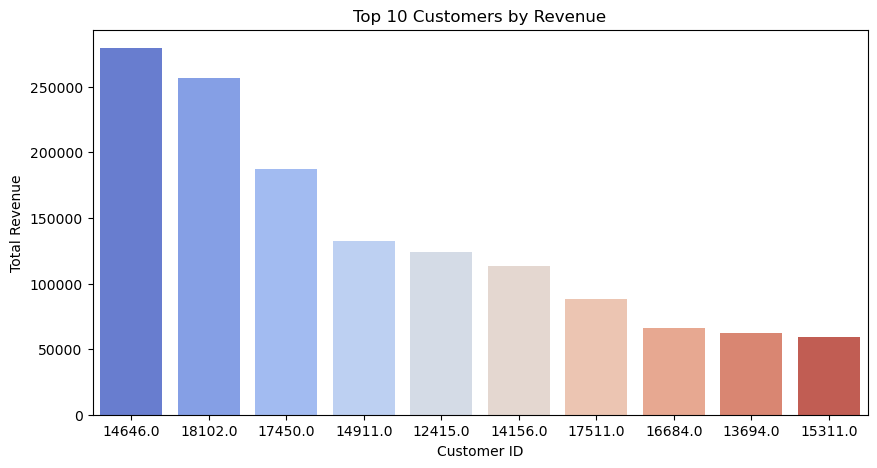

In [19]:
# Group by customer ID and sum total sales
customer_sales = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)

# Plot top 10 customers by revenue
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_sales.head(10).index.astype(str), y=customer_sales.head(10).values, palette='coolwarm')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.show()

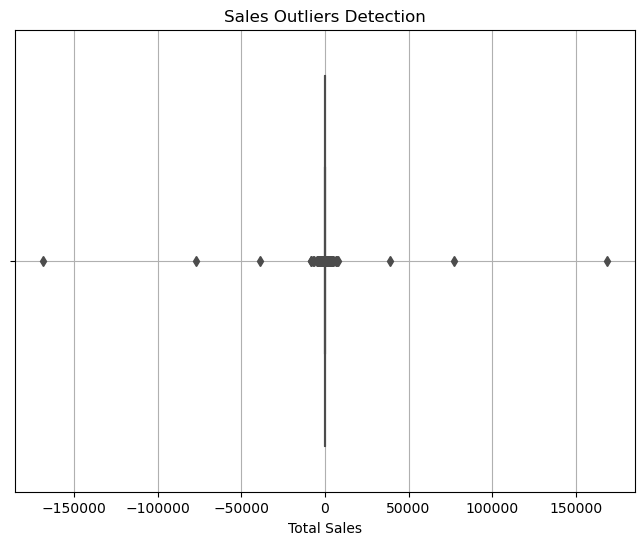

In [20]:
# Boxplot to detect outliers in total sales
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalSales'], color='red')
plt.title('Sales Outliers Detection')
plt.xlabel('Total Sales')
plt.grid(True)
plt.show()

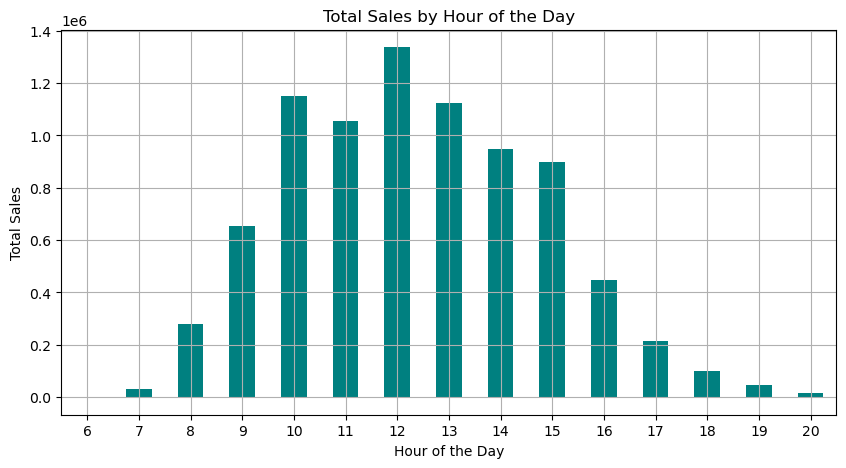

In [21]:
# Group sales by hour of the day
hourly_sales = df.groupby('Hour')['TotalSales'].sum()

# Plot sales by hour of the day
plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

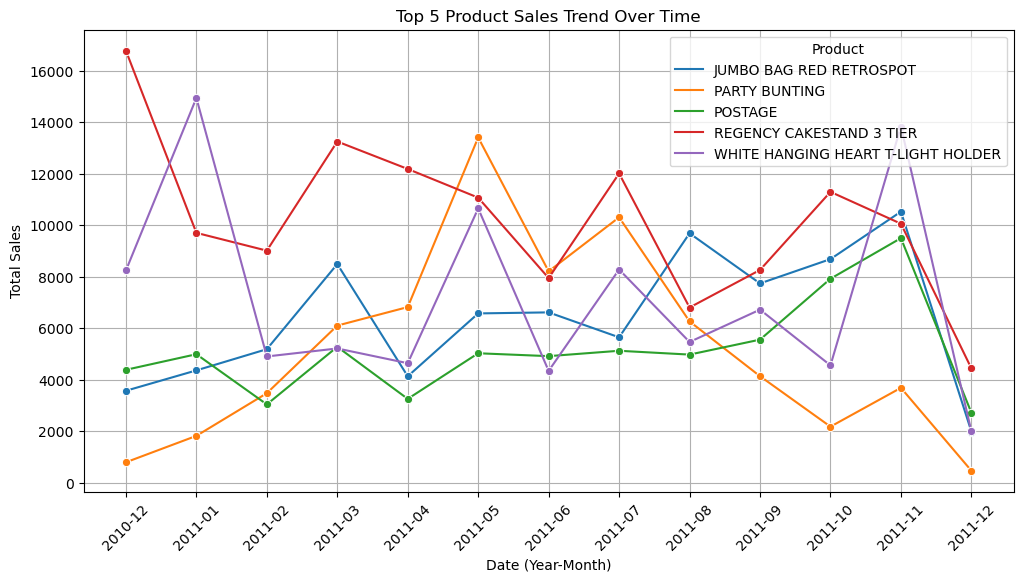

In [26]:
# Group sales by product and month
product_trend = df.groupby(['YearMonth', 'Description'])['TotalSales'].sum().reset_index()

# Select top 5 products to analyze
top_5_products = df.groupby('Description')['TotalSales'].sum().nlargest(5).index
product_trend = product_trend[product_trend['Description'].isin(top_5_products)]

# Convert 'YearMonth' to string format for plotting
product_trend['YearMonth'] = product_trend['YearMonth'].dt.strftime('%Y-%m')

# Plot sales trend of top 5 products
plt.figure(figsize=(12, 6))
sns.lineplot(data=product_trend, x='YearMonth', y='TotalSales', hue='Description', marker='o')
plt.title('Top 5 Product Sales Trend Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


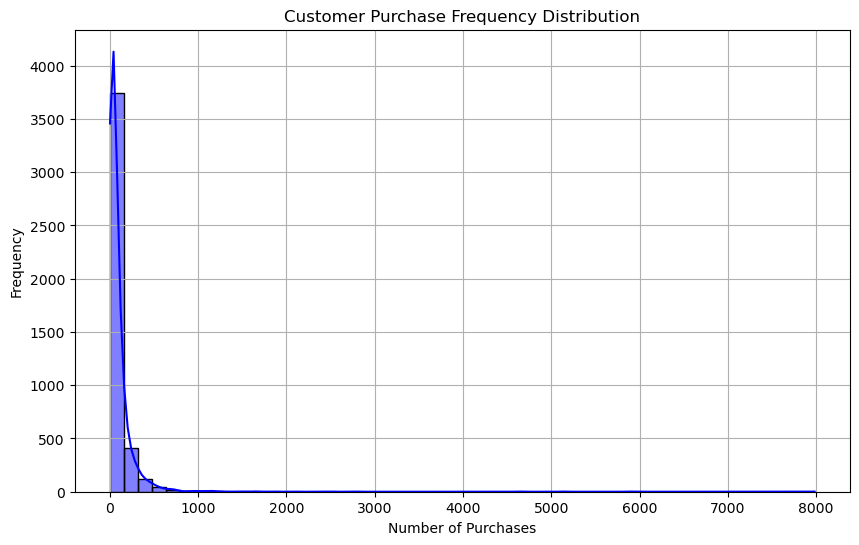

In [27]:
# Count purchases per customer
customer_purchases = df['CustomerID'].value_counts()

# Plot purchase frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchases, bins=50, kde=True, color='blue')
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

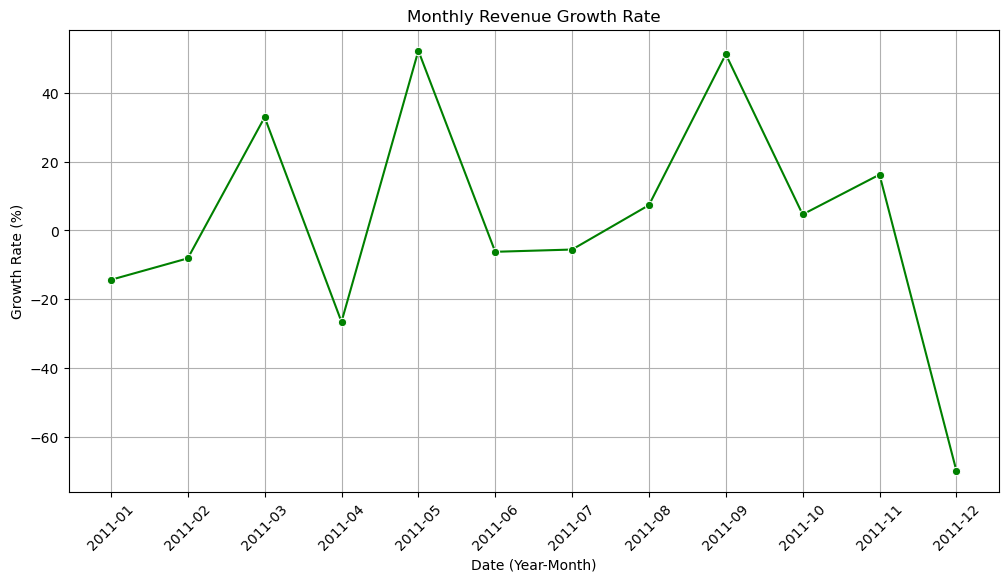

In [28]:
# Calculate monthly revenue growth
monthly_sales['RevenueGrowth'] = monthly_sales['TotalSales'].pct_change() * 100

# Plot monthly revenue growth rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='RevenueGrowth', marker='o', color='green')
plt.title('Monthly Revenue Growth Rate')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()